Nama : Elvaretta Salsabilla

NIM : 2241720116    

Kelas : 3E  

# Praktikum 1

## KMeans
KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah
k yang dipilih.

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Penjelasan :

Kode diatas digunakan untuk mengimpor library dan menampilkan dataset dalam bentuk table

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Penjelasan :

Kode tersebut memisahkan fitur (X) dan target (y) dari DataFrame df, di mana X berisi semua kolom kecuali yang pertama dan terakhir, sementara y berisi kolom terakhir. X.head() menampilkan 5 baris pertama dari fitur.

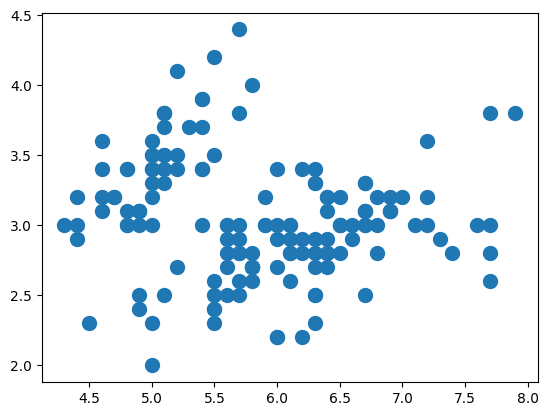

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Penjelasan :

Kode ini membuat scatter plot dari dua kolom pertama X dengan ukuran titik 100

- X.iloc[:, 0], mengambil kolom pertama dari X.

- X.iloc[:, 1], mengambil kolom kedua dari X.

- s = 100, mengatur ukuran titik scatter menjadi 100.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

Penjelasan :

Kode ini digunakan untuk membuat model KMeans clustering dengan 2 kluster,

- KMeans(n_clusters=2): Inisiasi model KMeans dengan 2 kluster.
- cl_kmeans.fit_predict(X): Melakukan fitting model KMeans pada data X dan sekaligus memprediksi kluster dari setiap data. Hasilnya, y_kmeans akan berisi label kluster (0 atau 1) untuk setiap data.

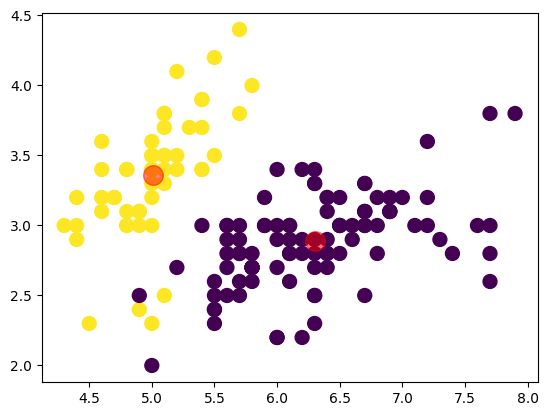

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Penjelasan :

Kode ini memplot hasil clustering KMeans berdasarkan dua fitur (Sepal Length dan Sepal Width),

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans):

- Membuat scatter plot dari dua kolom pertama (Sepal Length dan Sepal Width) dari X dengan ukuran titik 100.
- Warna (c=y_kmeans) ditentukan berdasarkan
hasil clustering (label kluster 0 atau 1).

centers = cl_kmeans.cluster_centers_:

- Mendapatkan koordinat centroid (pusat) dari kluster yang dihasilkan KMeans.

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5):

- Memplot titik centroid dengan warna merah, ukuran 200, dan transparansi (alpha) 0.5.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Penjelasan :

Kode diatas digunakan untuk mengembalikan nilai SSE, yaitu jumlah kuadrat jarak antara tiap titik data dengan centroid klusternya. Nilai ini menunjukkan seberapa baik kluster dibentuk—semakin kecil, semakin baik kluster terbentuk.

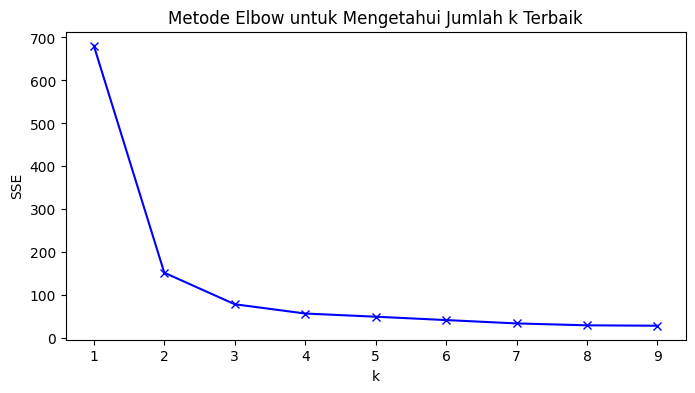

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Penjelasan :

Kode ini digunakan untuk mencari nilai SSE untuk berbagai jumlah kluster (k) guna menentukan k terbaik,

- sse = []: Membuat list kosong untuk menyimpan nilai SSE.
- K = range(1,10): Rentang jumlah kluster yang akan diuji, dari 1 hingga 9.
- for k in K: Looping untuk setiap nilai k dalam rentang tersebut.
- KMeans(n_clusters=k): Inisiasi model KMeans dengan k kluster.
- kmeanModel.fit(X): Melakukan fitting KMeans pada data X.
- sse.append(kmeanModel.inertia_): Menyimpan nilai SSE (inertia) untuk tiap k ke dalam list sse.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.34540931571815
k=5; SSE=49.95165000000001
k=6; SSE=42.1004105263158
k=7; SSE=34.31116758986839
k=8; SSE=29.881402210510913
k=9; SSE=28.951625536204826


Penjelasan :

Kode ini mencetak nilai SSE untuk setiap jumlah kluster (k) yang telah diuji sebelumnya,

- enumerate(sse, start=1): Mengiterasi list sse dan mendapatkan indeks (idx) serta nilai SSE (sse_val) untuk setiap elemen. start=1 membuat indeks mulai dari 1, bukan 0.

- print(f'k={idx}; SSE={sse_val}'): Mencetak nilai k dan SSE yang sesuai, sehingga hasilnya menunjukkan nilai SSE untuk setiap jumlah kluster yang diuji

# Praktikum 2
Konsep K-Means untuk klasterisasi data

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Penjelasan :

kode diatas digunakan untuk mengimpor library yang dibutuhkan

## Pengantar k-Means

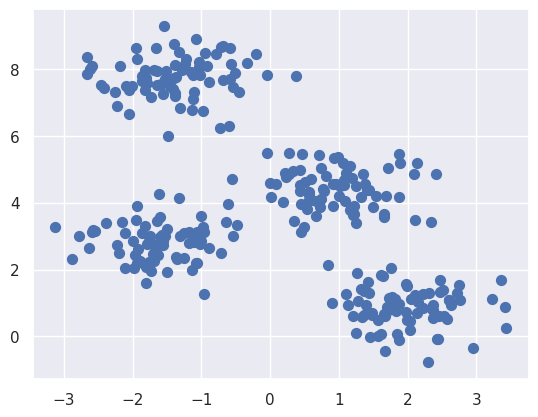

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Penjelasan :

Kode ini digunakan untuk membuat data buatan berbentuk kluster dan memvisualisasikannya,

make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0):

- Membuat dataset dengan 300 sampel yang dikelompokkan ke dalam 4 kluster.
- cluster_std=0.60: Menentukan sebaran atau variasi dari setiap kluster.
- random_state=0: Mengunci random seed untuk hasil yang konsisten setiap kali dijalankan.

plt.scatter(X[:, 0], X[:, 1], s=50):

- Membuat scatter plot dari data buatan, dengan kolom pertama X[:, 0] di sumbu x dan kolom kedua X[:, 1] di sumbu y.
- s=50: Mengatur ukuran titik scatter menjadi 50.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Penjelasan :

Kode ini digunakan untuk menerapkan algoritma KMeans clustering pada dataset yang telah dibuat sebelumnya,

- KMeans(n_clusters=4): Menginisiasi model KMeans dengan 4 kluster.
- kmeans.fit(X): Melatih model KMeans pada data X, sehingga model dapat menemukan pola dan mengelompokkan data menjadi 4 kluster.
- y_kmeans = kmeans.predict(X): Menggunakan model yang telah dilatih untuk memprediksi kluster dari setiap titik data dalam X. Hasilnya, y_kmeans berisi label kluster (0 hingga 3) untuk setiap sampel.

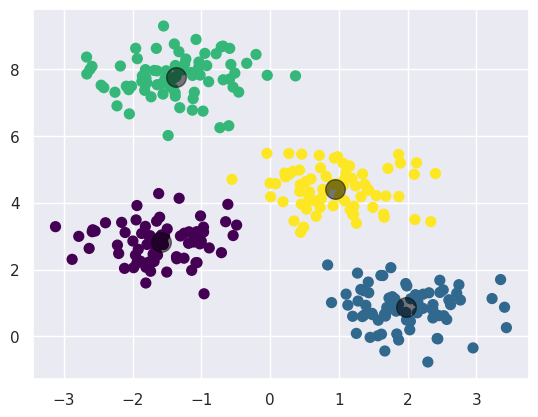

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Penjelasan :

Kode ini digunakan untuk memvisualisasikan hasil clustering KMeans dan menunjukkan posisi centroid kluster,

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis'):

- Membuat scatter plot dari data X, di mana sumbu x adalah kolom pertama (X[:, 0]) dan sumbu y adalah kolom kedua (X[:, 1]).
Warna titik (c=y_kmeans) ditentukan oleh label kluster yang dihasilkan oleh model KMeans.
- s=50: Mengatur ukuran titik menjadi 50.
- cmap='viridis': Menggunakan skema warna 'viridis' untuk menampilkan warna berdasarkan kluster.

centers = kmeans.cluster_centers_:

- Mendapatkan koordinat centroid (pusat) dari kluster yang dihasilkan oleh KMeans.

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5):

- Memplot titik centroid dengan warna hitam, ukuran 200, dan transparansi (alpha) 0.5.

## Algoritma Expectation-Maximization

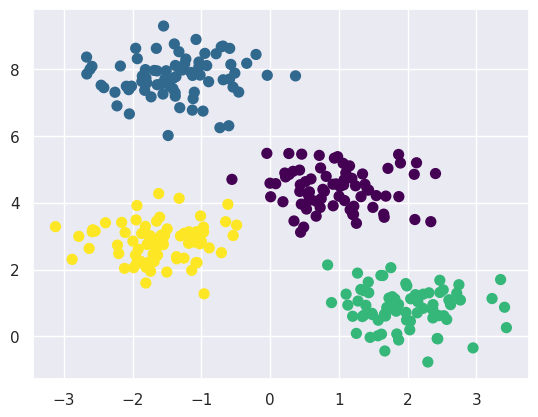

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Penjelasan :

Kode ini mendefinisikan fungsi find_clusters untuk melakukan clustering menggunakan metode KMeans secara manual, dan kemudian memvisualisasikannya,

Fungsi find_clusters(X, n_clusters, rseed=2):

Input:
- X: Data yang akan dikelompokkan.
- n_clusters: Jumlah kluster yang diinginkan.
- rseed: Random seed untuk konsistensi hasil.

Proses:
- Pemilihan Acak: Memilih posisi awal centroid secara acak dari data.

Iterasi:
- Menghitung label kluster untuk setiap titik data berdasarkan jarak ke centroid (pairwise_distances_argmin).
- Memperbarui posisi centroid dengan menghitung rata-rata titik-titik dalam setiap kluster.
- Memeriksa konvergensi dengan membandingkan centroid baru dengan yang lama.

Output:
- Mengembalikan centroid akhir dan label kluster untuk setiap titik data.

Menjalankan fungsi dan memvisualisasikan hasil:

- centers, labels = find_clusters(X, 4): Menemukan kluster untuk data X dengan 4 kluster.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50,

- cmap='viridis'): Membuat scatter plot dari data X, diwarnai berdasarkan label kluster yang dihasilkan.

### Perubahan random

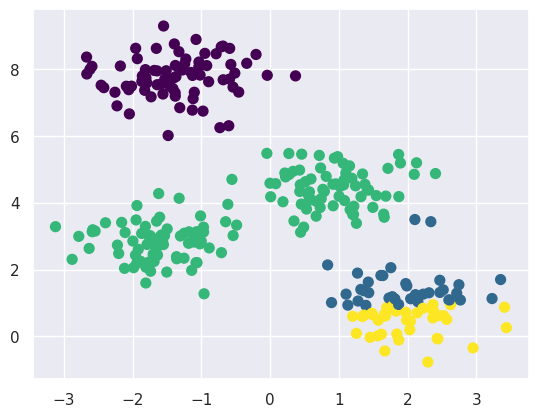

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Penjelasan :

Kode ini menjalankan fungsi find_clusters untuk menemukan 4 kluster dari data X dengan rseed=0 untuk hasil yang konsisten. Hasil kluster divisualisasikan menggunakan scatter plot, di mana titik-titik diwarnai sesuai dengan label kluster yang dihasilkan.

### Optimalisasi Jumlah Klaster

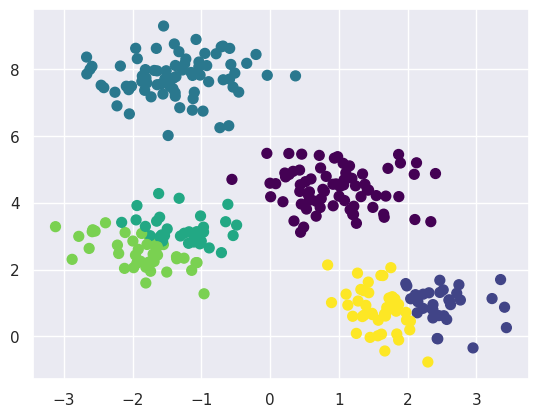

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Penjelasan :

Kode ini menggunakan KMeans untuk mengelompokkan data X menjadi 6 kluster dan menyimpan label kluster dalam variabel labels. Hasilnya divisualisasikan dengan scatter plot, di mana titik-titik diwarnai sesuai label kluster.

### Batas Klaster yang Tidak Selalu Linier

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Penjelasan :

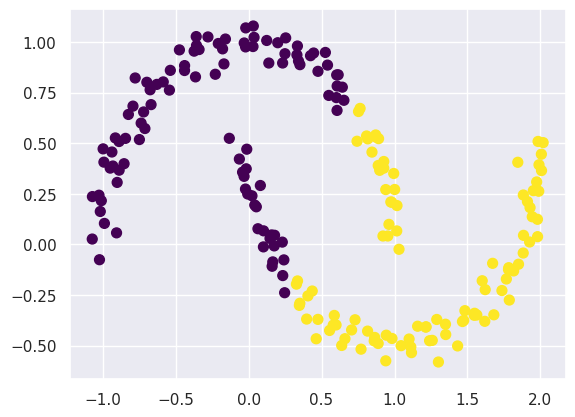

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Penjelasan :

Kode ini digunakan untuk membuat dataset buatan berbentuk dua setengah bulan (moons),

- make_moons(200, noise=.05, random_state=0):
Membuat dataset dengan 200 sampel yang memiliki bentuk setengah bulan.
- noise=0.05: Menambahkan sedikit gangguan (noise) untuk membuat data lebih realistis dan tidak terlalu teratur.
- random_state=0: Mengunci random seed agar hasil yang dihasilkan konsisten setiap kali kode dijalankan.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


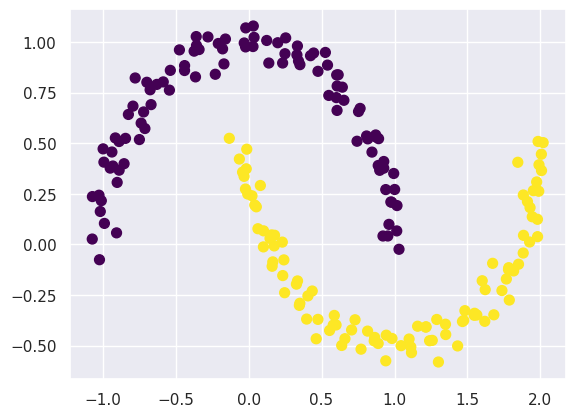

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Penjelasan :

Kode ini menggunakan algoritma Spectral Clustering untuk mengelompokkan data dan memvisualisasikan hasilnya,

**Inisialisasi Model**

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'):

- Membuat objek SpectralClustering untuk mengelompokkan data menjadi 2 kluster (n_clusters=2).
- affinity='nearest_neighbors': Menggunakan hubungan tetangga terdekat untuk membangun graf dari data.
- assign_labels='kmeans': Menggunakan KMeans untuk mengassign label kluster setelah perhitungan spektral.

**Clustering dan Mendapatkan Label**

labels = model.fit_predict(X):

- Melatih model pada data X dan mengembalikan label kluster untuk setiap titik data, disimpan dalam variabel labels.

**Visualisasi Hasil**

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):

- Membuat scatter plot dari data X, di mana titik-titik diwarnai sesuai label kluster yang dihasilkan (c=labels).
- s=50 mengatur ukuran titik menjadi 50.
- cmap='viridis' menggunakan skema warna 'viridis' untuk mewarnai titik berdasarkan kluster.

## Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Penjelasan :


Kode ini digunakan untuk memuat dataset angka tulisan tangan dan memeriksa dimensi data,

**Memuat Dataset**

- digits = load_digits(): Mengambil dataset angka tulisan tangan yang disediakan oleh sklearn. Dataset ini terdiri dari gambar angka (0-9) yang telah diproses menjadi fitur numerik.

**Memeriksa Dimensi Data**

- digits.data.shape: Mengambil bentuk (shape) dari data fitur dalam dataset. Ini memberikan informasi tentang jumlah sampel dan jumlah fitur yang ada.
- digits.data berisi fitur gambar angka yang diubah menjadi format numerik, di mana setiap angka diwakili oleh vektor piksel.

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Penjelasan :
Kode ini menerapkan algoritma K-Means pada dataset angka tulisan tangan dan memeriksa dimensi centroid kluster yang dihasilkan,

**Inisialisasi dan Penerapan K-Means**

kmeans = KMeans(n_clusters=10, random_state=0):

- Membuat objek KMeans dengan 10 kluster, sesuai dengan jumlah digit (0-9).
- random_state=0 memastikan hasil yang konsisten setiap kali kode dijalankan.

clusters = kmeans.fit_predict(digits.data):

- Melatih model KMeans pada data fitur digits.data dan mengembalikan label kluster untuk setiap sampel, yang disimpan dalam variabel clusters.

**Memeriksa Dimensi Centroid Kluster**

- kmeans.cluster_centers_.shape: Mengambil bentuk (shape) dari array centroid kluster yang dihasilkan oleh KMeans. Ini memberikan informasi tentang jumlah kluster dan dimensi masing-masing centroid.

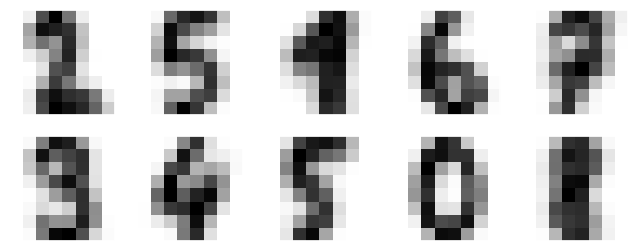

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Penjelasan :

Kode ini digunakan untuk memvisualisasikan centroid dari kluster yang dihasilkan oleh model K-Means untuk dataset angka tulisan tangan,

**Membuat Subplot**

- fig, ax = plt.subplots(2, 5, figsize=(8, 3)): Membuat sebuah figure dengan 2 baris dan 5 kolom subplot, dan mengatur ukuran figure menjadi 8x3 inci.

**Mengubah Bentuk Centroid**

- centers = kmeans.cluster_centers_.reshape(10, 8, 8): Mengubah bentuk centroid kluster (dari 2D menjadi 3D) agar dapat ditampilkan sebagai gambar 8x8 piksel, di mana 10 adalah jumlah kluster (angka 0-9).

**Visualisasi Centroid**

for axi, center in zip(ax.flat, centers): Mengulangi setiap subplot (axi) dan centroid (center) untuk memvisualisasikannya.

- axi.set(xticks=[], yticks=[]): Menghapus tanda pada sumbu x dan y untuk memperjelas tampilan.
- axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary): Menampilkan centroid sebagai gambar menggunakan colormap biner.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Penjelasan :

Kode ini digunakan untuk mengonversi label kluster hasil K-Means menjadi label yang sesuai dengan kelas target asli dari dataset angka tulisan tangan,

**Inisialisasi Array Labels**

- labels = np.zeros_like(clusters): Membuat array labels dengan ukuran yang sama seperti clusters, diisi dengan nol. Array ini akan digunakan untuk menyimpan label yang sesuai.

**Iterasi Melalui Setiap Kluster**

for i in range(10): Mengulangi untuk setiap kluster dari 0 hingga 9.

- mask = (clusters == i): Membuat array boolean (mask) yang menunjukkan posisi titik data yang termasuk dalam kluster ke-i.

**Menentukan Label yang Paling Umum**

labels[mask] = mode(digits.target[mask])[0]:

- Menggunakan fungsi mode dari scipy.stats untuk menemukan label target yang paling umum (modus) dari titik data yang termasuk dalam kluster ke-i.
- Label yang paling umum tersebut kemudian disimpan dalam array labels pada posisi yang sesuai dengan mask.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Penjelasan :

Kode ini digunakan untuk menghitung akurasi dari prediksi kluster yang dihasilkan oleh model K-Means dibandingkan dengan label target asli dari dataset angka tulisan tangan,

**Menghitung Akurasi**

accuracy_score(digits.target, labels): Menggunakan fungsi accuracy_score dari sklearn.metrics untuk menghitung akurasi antara dua array:

- digits.target: Array yang berisi label asli (target) untuk setiap angka dalam dataset.
- labels: Array yang berisi label yang dihasilkan oleh K-Means setelah diubah untuk mencocokkan dengan label asli.


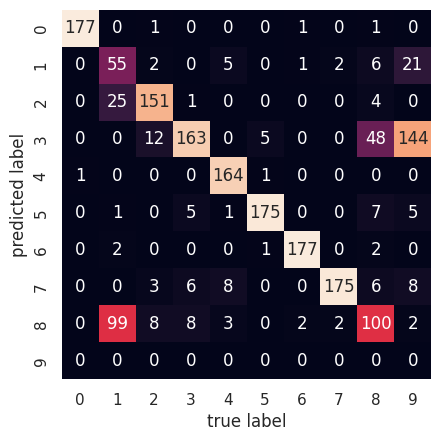

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Penjelasan :

Kode ini menghitung dan memvisualisasikan matriks kebingungan untuk model K-Means

**Matriks Kebingungan**

- mat = confusion_matrix(digits.target, labels): Menghitung matriks kebingungan yang membandingkan label asli dan label hasil kluster.

**Visualisasi**

- sns.heatmap(): Menggunakan heatmap untuk menampilkan matriks kebingungan dengan nilai di dalam sel dan label angka pada sumbu x dan y.

**Label Sumbu**

- plt.xlabel('true label') dan plt.ylabel('predicted label'): Memberi label pada sumbu x dan y.

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

Penjelasan :

Kode ini menerapkan t-SNE untuk mereduksi dimensi data angka tulisan tangan dan kemudian menerapkan K-Means untuk mengelompokkan data yang telah direduksi,

**Reduksi Dimensi dengan t-SNE**

- tsne = TSNE(n_components=2, init='random', random_state=0): Menginisialisasi t-SNE untuk mereduksi data ke 2 dimensi.
- digits_proj = tsne.fit_transform(digits.data): Menerapkan t-SNE pada data angka untuk mendapatkan representasi 2D.

**K-Means Clustering**

- kmeans = KMeans(n_clusters=10, random_state=0): Menginisialisasi model K-Means dengan 10 kluster.
- clusters = kmeans.fit_predict(digits_proj): Melatih model K-Means pada data yang telah direduksi dan mendapatkan label kluster.

**Permutasi Label**

- Mengonversi label kluster menjadi label yang sesuai dengan target asli berdasarkan modus dari target untuk setiap kluster.

**Menghitung Akurasi**

- accuracy_score(digits.target, labels): Menghitung akurasi dari label yang dihasilkan dibandingkan dengan label asli.

### Studi Kasus 2: Kompresi Citra

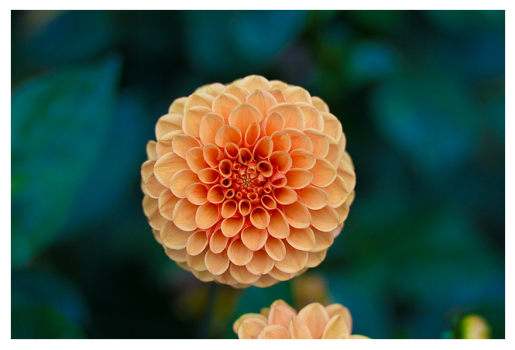

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

Penjelasan :

Kode diatas digunakan untuk menampilkan gambar bunga

**Memuat Gambar**

- flower = load_sample_image("flower.jpg"): Memuat gambar bunga dari dataset contoh yang disediakan oleh sklearn.

**Menampilkan Gambar**

- ax = plt.axes(xticks=[], yticks=[]): Membuat axes untuk plot tanpa tanda pada sumbu x dan y.
ax.imshow(flower): Menampilkan gambar bunga pada axes yang telah dibuat.

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Penjelasan :

Kode ini menyiapkan data gambar bunga untuk analisis,

- Normalisasi: data = flower / 255.0 menormalkan nilai piksel dari rentang 0-255 menjadi 0-1.
- Reshape: data = data.reshape(427 * 640, 3) mengubah gambar menjadi array 2D di mana setiap baris mewakili satu piksel RGB.
- Dimensi: data.shape mengembalikan bentuk data, yang seharusnya (273280, 3).

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Penjelasan :

Kode ini mendefinisikan fungsi plot_pixels untuk memvisualisasikan distribusi warna piksel dalam gambar,

**Parameter**

- data: Array piksel RGB yang akan dipetakan.
- title: Judul untuk plot.
- colors: Warna untuk setiap titik; jika tidak ada, menggunakan data sebagai warna.
- N: Jumlah piksel yang akan ditampilkan (default 10.000).

**Pemilihan Subset**

- Memilih subset acak dari data dan colors menggunakan rng.permutation.

**Membagi Saluran Warna**

- R, G, B = data[i].T: Memisahkan saluran warna merah, hijau, dan biru dari subset.

**Plotting**

Membuat dua subplot

- Subplot pertama: Menampilkan scatter plot antara saluran merah dan hijau.
- Subplot kedua: Menampilkan scatter plot antara saluran merah dan biru.
Mengatur label sumbu dan batas untuk kedua plot.

**Judul**

- fig.suptitle(title, size=20): Menambahkan judul ke plot.

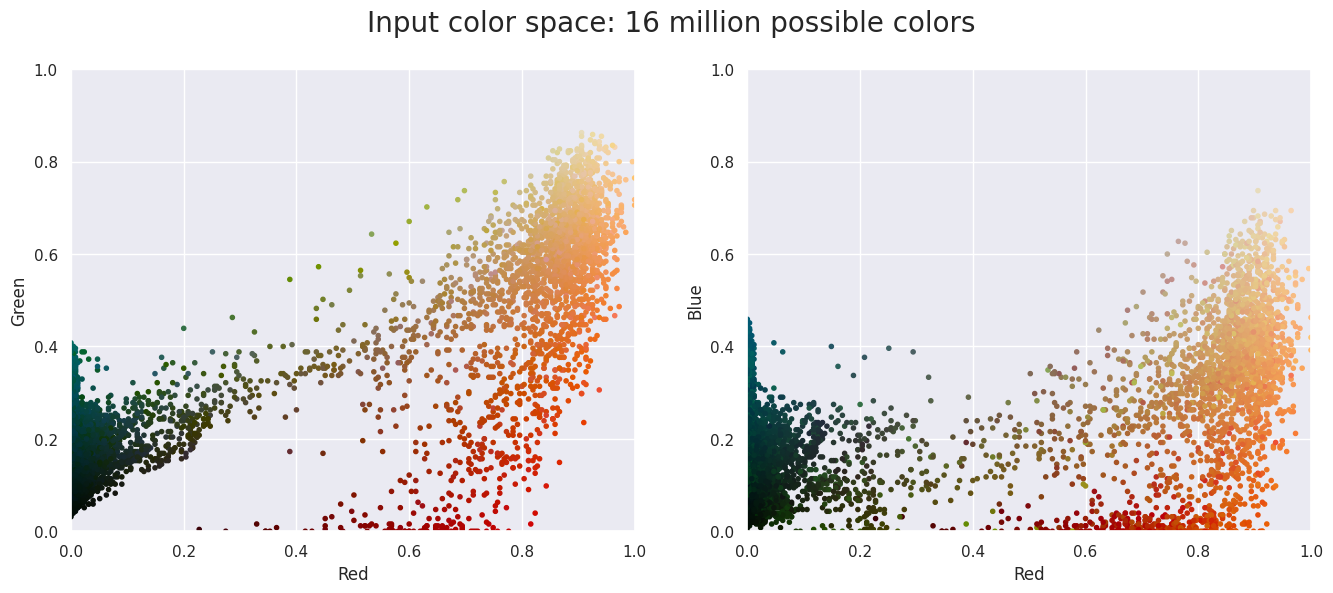

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Penjelasan :

Kode diatas memanggil fungsi plot_pixels untuk menampilkan distribusi warna piksel dari gambar, dengan judul "Input color space: 16 million possible colors".

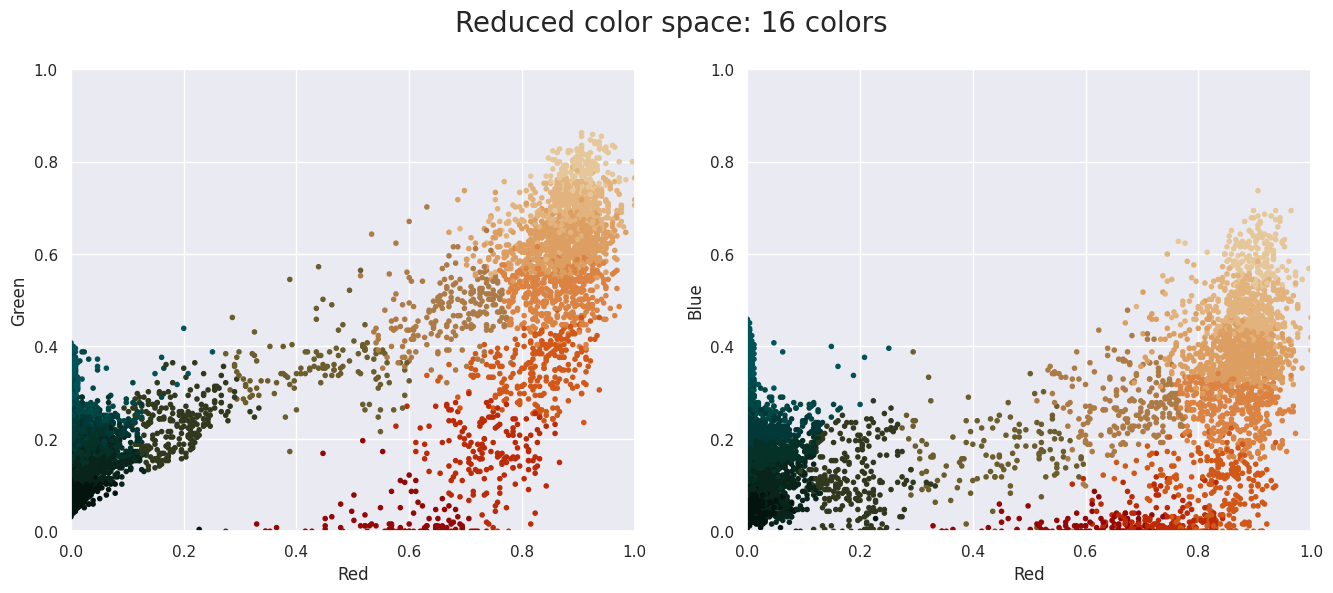

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Penjelasan :

Kode ini menerapkan MiniBatchKMeans untuk mengurangi jumlah warna dalam gambar dan kemudian memvisualisasikannya,

**Mengabaikan Peringatan**

- import warnings; warnings.simplefilter('ignore'): Mengabaikan peringatan yang muncul, terutama terkait masalah dengan NumPy.

**Menginisialisasi MiniBatchKMeans**

- kmeans = MiniBatchKMeans(16): Membuat objek K-Means dengan 16 kluster untuk mengelompokkan warna.

**Melatih Model**

- kmeans.fit(data): Melatih model pada data warna piksel untuk menemukan 16 warna dominan.

**Menghasilkan Warna Baru**

- new_colors = kmeans.cluster_centers_[kmeans.predict(data)]: Menggunakan pusat kluster untuk menghasilkan warna baru berdasarkan kluster yang diprediksi.

**Visualisasi**

- plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors"): Memanggil fungsi plot_pixels untuk menampilkan distribusi warna dengan warna yang telah direduksi, berjudul "Reduced color space: 16 colors".

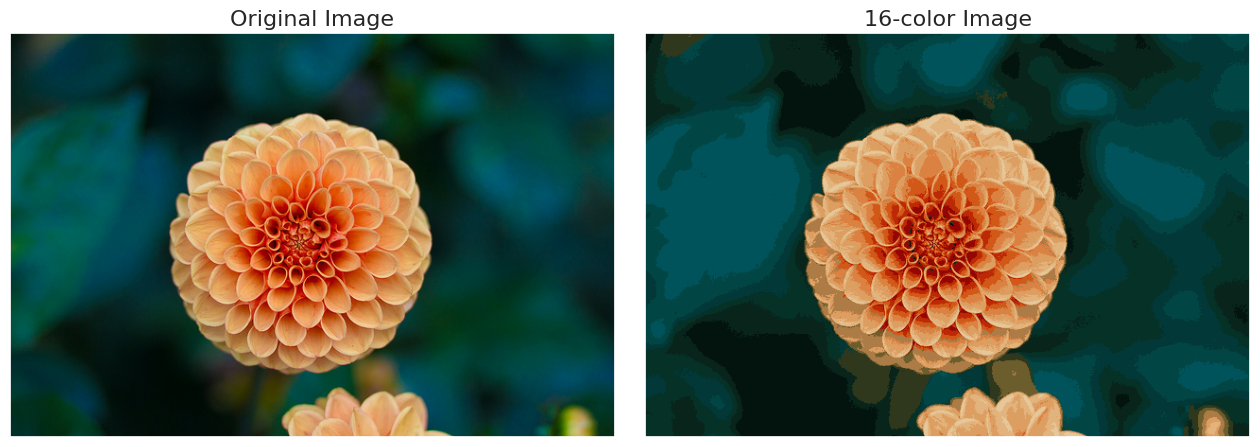

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

Penjelasan :

Kode ini menampilkan gambar bunga asli dan versi yang telah direduksi warnanya menjadi 16 warna,

**Mewarnai Ulang Gambar**

- flower_recolored = new_colors.reshape(flower.shape): Mengubah bentuk new_colors sehingga sesuai dengan bentuk gambar asli flower.

**Membuat Subplot**

- fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[])): Membuat dua subplot untuk menampilkan gambar.

**Pengaturan Gambar**

- ax[0].imshow(flower): Menampilkan gambar asli di subplot pertama.
- ax[0].set_title('Original Image', size=16): Menetapkan judul "Original Image" untuk subplot pertama.
- ax[1].imshow(flower_recolored): Menampilkan gambar yang telah direduksi warnanya di subplot kedua.
- ax[1].set_title('16-color Image', size=16): Menetapkan judul "16-color Image" untuk subplot kedua.

# Praktikum 3
Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY.

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=c6b8c7ad972a731c225420446aa0faa50eddfc4d30fec021cceabe37b358681b
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


Penjelasan :    

Kode ini digunakan untuk menginstal library MiniSom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Penjelasan :

kode diatas digunakan untuk mengimpor library yang dibutuhkan

Gunakan dataset Iris sebagai contoh

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Penjelasan :

kode diatas digunakan untuk memuat dataset

Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

Penjelasan :

kode diatas digunakan untuk normalisasi data

data = data / data.max(axis=0) membagi setiap elemen dalam data dengan nilai maksimum dari setiap kolom.

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Penjelasan :


Kode ini menginisialisasi Self-Organizing Map (SOM),

**Ukuran Peta**
- map_size = (10, 10) menentukan ukuran peta SOM menjadi 10x10.

**Inisialisasi SOM**

- MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5):
- map_size[0] dan map_size[1]: Ukuran grid SOM (10x10).
- data.shape[1]: Jumlah fitur dalam data (dimensi input).
- sigma=0.5: Menentukan lebar fungsi gauss untuk pembelajaran.
- learning_rate=0.5: Kecepatan pembelajaran model.

Inisialisasi bobot SOM secara acak.

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Penjelasan :

Melatih SOM dengan data menggunakan metode train_random.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Penjelasan :


Kode ini menginisialisasi bobot Self-Organizing Map (SOM) secara aca,

som.random_weights_init(data):

- Menginisialisasi bobot awal SOM menggunakan nilai acak yang didasarkan pada data input (data).
- Bobot tersebut akan digunakan sebagai titik awal untuk pelatihan SOM.

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

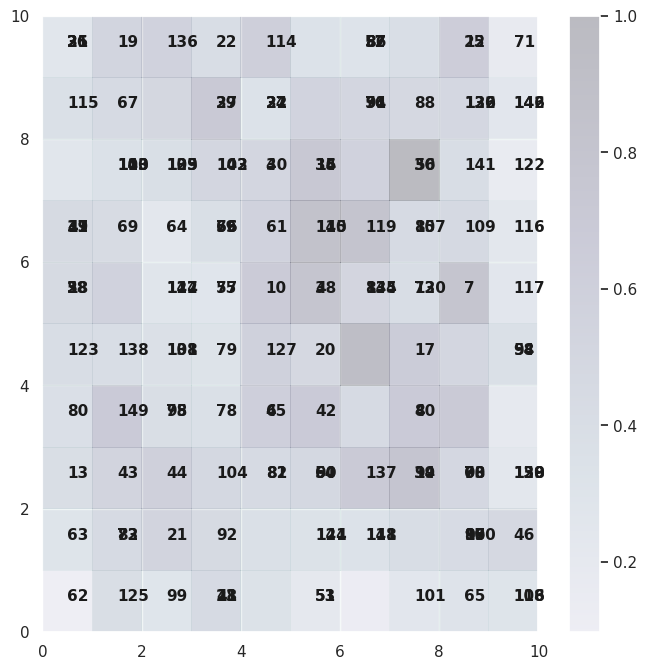

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

Penjelasan :

Kode ini memvisualisasikan hasil Self-Organizing Map (SOM) dengan menampilkan peta grid dan lokasi "pemenang" (unit yang paling cocok untuk tiap sampel data),

**Membuat Gambar**

- plt.figure(figsize=(8, 8)): Membuat kanvas gambar dengan ukuran 8x8 untuk visualisasi.
Plot Setiap Sampel Data:

for i, x in enumerate(data): Melakukan iterasi melalui setiap sampel data.
w = som.winner(x): Menemukan unit pemenang di peta SOM untuk sampel x (yaitu, unit yang paling mirip dengan sampel tersebut).
plt.text(w[0]+.5, w[1]+.5, str(i+1), ...): Menempatkan teks (nomor sampel i+1) pada posisi unit pemenang di peta SOM dengan sedikit offset (agar tidak tumpang tindih dengan grid).
Menampilkan Distance Map:

plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2): Menggambar peta jarak (distance map) yang memperlihatkan jarak antara neuron-neuron di SOM. Warna merepresentasikan seberapa "berbeda" neuron tetangga di SOM.
plt.colorbar(): Menambahkan bar warna untuk menunjukkan skala jarak.
Tampilkan Gambar:

plt.show(): Menampilkan peta SOM dan hasil visualisasi.

# Praktikum 4

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

Penjelasan :

kode ini digunakan untuk mengimpor library yang dibutuhkan

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

Penjelasan :

Kode ini mendefinisikan fungsi untuk menginisialisasi bobot Self-Organizing Map (SOM) dengan nilai acak,

**Fungsi initialize_weights**

- Fungsi ini bertujuan untuk menghasilkan bobot acak bagi SOM.

Parameter:

- input_shape: Bentuk dari data input, biasanya berupa dimensi dari data (misalnya, jumlah fitur).
- output_shape: Bentuk dari peta SOM, yaitu ukuran grid (misalnya, 10x10).

**Menghasilkan Bobot Acak**

np.random.rand(output_shape[0], output_shape[1], input_shape[2]): Menghasilkan array 3D dengan nilai acak antara 0 dan 1, yang memiliki ukuran sesuai dengan:
- output_shape[0] dan output_shape[1]: Ukuran grid SOM (misalnya 10x10).
- input_shape[2]: Jumlah fitur dari data input (dimensi fitur data).

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

Penjelasan :


Kode ini mendefinisikan fungsi untuk menghitung jarak antara vektor input dan bobot Self-Organizing Map (SOM) menggunakan norma Euclidean,

Fungsi calculate_distance:

- Fungsi ini menghitung jarak antara setiap vektor input dengan bobot-bobot neuron di SOM.

Parameter:

- input_vector: Vektor input yang akan dibandingkan (misalnya, sampel data).
- weights: Bobot neuron dalam peta SOM.
Perhitungan Jarak:

np.linalg.norm(input_vector - weights, axis=2):

- input_vector - weights: Menghitung selisih antara vektor input dan setiap bobot neuron di peta SOM.
- np.linalg.norm(..., axis=2): Menghitung norma Euclidean (jarak) dari hasil pengurangan di sepanjang sumbu 2 (dimensi fitur). Ini menghasilkan jarak antara vektor input dengan setiap neuron.

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

Penjelasan :

Kode ini mendefinisikan fungsi untuk menemukan unit pemenang di Self-Organizing Map (SOM), yaitu unit yang memiliki bobot terdekat dengan vektor input,

**Fungsi find_winner_unit_in_image**

- Fungsi ini bertujuan untuk menemukan unit SOM yang paling dekat dengan vektor input berdasarkan jarak antara vektor input dan bobot neuron.

**Parameter**

- input_vector: Vektor input yang akan dibandingkan dengan bobot-bobot neuron.
weights: Array berisi bobot neuron dari SOM.

**Langkah-Langkah**

Menghitung Jarak:

- distances = calculate_distance(input_vector, weights): Menghitung jarak antara vektor input dan semua bobot neuron menggunakan fungsi calculate_distance, yang mengembalikan array jarak.

**Menemukan Jarak Minimum**

- np.argmin(distances): Mencari indeks dari jarak terkecil dalam array  distances, yang menunjukkan neuron dengan bobot terdekat ke vektor input.

**Mengembalikan Indeks 2D**

- np.unravel_index(np.argmin(distances), distances.shape): Mengubah indeks linear (hasil dari np.argmin) menjadi indeks 2D sesuai dengan bentuk peta SOM (distances.shape), untuk menemukan posisi unit pemenang di grid.

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

Penjelasan :
Kode ini mendefinisikan fungsi untuk memperbarui bobot neuron di Self-Organizing Map (SOM) setelah menemukan unit pemenang, menggunakan prinsip pembelajaran berbasis tetangga,

**Fungsi update_weights**

Fungsi ini memperbarui bobot neuron di peta SOM berdasarkan vektor input, dengan mempertimbangkan pengaruh dari unit pemenang dan unit-unit tetangganya.

**Parameter**

- input_vector: Vektor input yang digunakan untuk memperbarui bobot.
weights: Array berisi bobot neuron dari SOM.
- winner: Indeks 2D dari unit pemenang (neuron yang paling dekat dengan vektor input).
- learning_rate: Tingkat pembelajaran yang mengontrol seberapa besar perubahan bobot.
- neighborhood_radius: Radius tetangga yang mengontrol seberapa besar pengaruh unit pemenang terhadap unit-unit tetangganya.

**Langkah-Langkah**

Menghitung Jarak dari Pemenang

- np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1):
np.indices(weights.shape[:2]) menghasilkan koordinat grid dari semua neuron di peta SOM.
- winner: Posisi unit pemenang.
Hasil pengurangan ini adalah jarak setiap neuron dari unit pemenang dalam bentuk koordinat 2D.

**Menghitung Pengaruh Tetangga**

- np.linalg.norm(..., axis=2): Menghitung jarak Euclidean dari setiap neuron ke unit pemenang.
- influence = np.exp(-distances / (2 * neighborhood_radius**2)): Menghitung pengaruh (influence) dari unit pemenang ke unit tetangganya menggunakan fungsi eksponensial, dengan jarak yang lebih jauh memiliki pengaruh lebih kecil.

**Memperbarui Bobot**

weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights):

- input_vector - weights: Menghitung selisih antara vektor input dan bobot neuron.
- learning_rate * influence[:, :, np.newaxis]: Mengalikan selisih dengan tingkat pembelajaran dan pengaruh untuk memperbarui bobot neuron.
- Bobot neuron yang lebih dekat ke pemenang akan diperbarui lebih signifikan.

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

Penjelasan :

Fungsi train_som digunakan untuk melatih Self-Organizing Map (SOM) dengan menggunakan gambar input,

**Parameter**

- image: Gambar input yang akan digunakan untuk melatih SOM.
- num_epochs: Jumlah epoch (iterasi) untuk pelatihan.
- initial_learning_rate: Tingkat pembelajaran awal.
- initial_neighborhood_radius: Radius tetangga awal.

**Inisialisasi**

- input_shape: Mengambil bentuk (dimensi) dari gambar input.
- som_shape: Menentukan ukuran peta SOM (10x10) dan jumlah saluran warna dari gambar.
- weights: Menginisialisasi bobot neuron SOM menggunakan fungsi initialize_weights.

**Proses Pelatihan**

- Untuk setiap epoch, parameter pembelajaran (learning_rate) dan radius tetangga (neighborhood_radius) diperbarui secara eksponensial untuk mengurangi nilai seiring bertambahnya epoch.
- Dua loop bersarang digunakan untuk memproses setiap piksel dalam gambar:
   - input_vector: Mengambil vektor warna dari piksel tertentu.
   - winner: Menemukan unit pemenang menggunakan find_winner_unit_in_image.
   - update_weights: Memperbarui bobot neuron berdasarkan vektor input, unit pemenang, tingkat pembelajaran, dan radius tetangga.

**Hasil**

- Setelah proses pelatihan selesai, fungsi mengembalikan bobot neuron yang terlatih (weights).

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "/content/drive/MyDrive/Colab Notebooks/PCVK/images/Lena.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

Penjelasan :

kode ini digunakan untuk memuat gambar dan melakukan normalisasi intensitas piksel menjadi rentang [0, 1]

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

Penjelasan :

Kode ini melakukan pelatihan Self-Organizing Map (SOM) menggunakan gambar Lenna dengan parameter yang ditentukan,
**Parameter Pelatihan**

- num_epochs = 100: Menentukan jumlah iterasi pelatihan yang akan dilakukan pada SOM.
- initial_learning_rate = 0.1: Menetapkan tingkat pembelajaran awal untuk memperbarui bobot neuron.
- initial_neighborhood_radius = 5: Menentukan radius tetangga awal, yang mempengaruhi seberapa banyak neuron di sekitar unit pemenang akan diperbarui.

**Pelatihan SOM**

- trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius): Memanggil fungsi train_som dengan gambar Lenna dan parameter yang telah ditentukan.
- Hasil dari pelatihan, yaitu bobot neuron yang terlatih, disimpan dalam variabel trained_weights.

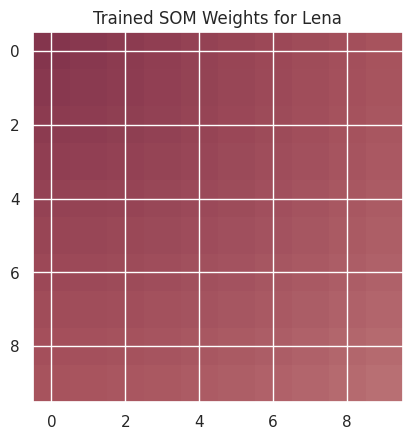

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

Penjelasan :

ode ini digunakan untuk memvisualisasikan bobot yang telah dilatih dari Self-Organizing Map (SOM) yang diterapkan pada gambar Lenna,

**Visualisasi**

- plt.imshow(trained_weights): Menggunakan fungsi imshow dari Matplotlib untuk menampilkan bobot neuron yang telah terlatih (trained_weights) sebagai gambar. Fungsi ini akan menginterpretasikan nilai bobot sebagai warna pada peta.

**Menambahkan Judul**

- plt.title('Trained SOM Weights for Lena'): Menambahkan judul pada plot untuk memberikan konteks bahwa gambar yang ditampilkan adalah bobot SOM yang terlatih untuk gambar Lenna.

**Menampilkan Gambar**

- plt.show(): Menampilkan gambar hasil visualisasi ke layar.

# TUGAS

Buatlah sebuah model K-Means dengan ketentuan,

- Gunakan data 'Mall_Customers.csv'

- Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

- Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

- Buatlah  implementasi model SOM untuk segmentasi citra lain

Import data

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=140d3134a6a7f4dca56c62e4c24b1ea30c3933eeb015d6914bcd1e13ab2c52c6
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
from sklearn.datasets import load_sample_image

Load data

In [4]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


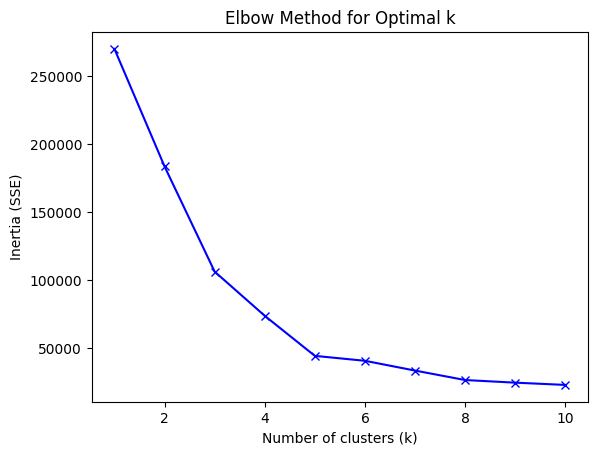

In [5]:
# Memilih fitur yang tepat
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Langkah 2: Tentukan jumlah kluster optimal menggunakan Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [6]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(inertia, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436
k=10; SSE=23103.122085983905


Membuat model K-Means berdasarkan k optimal

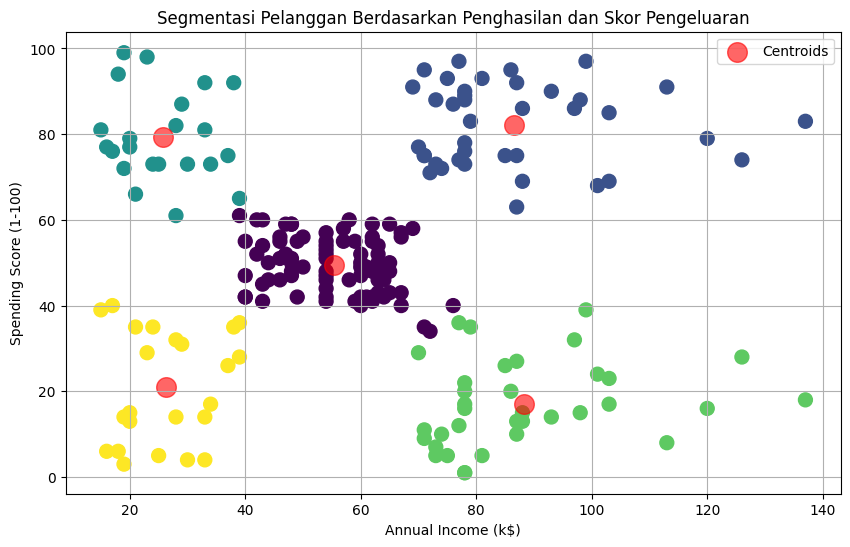

In [7]:
k_optimal = 5

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans_final = kmeans_final.fit_predict(X)

# Visualisasi clustering dengan k=5
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans_final, s=100, cmap='viridis')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='red', s=200, alpha=0.6, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Segmentasi Pelanggan Berdasarkan Penghasilan dan Skor Pengeluaran')
plt.legend()
plt.grid()
plt.show()


In [8]:
# Print hasil nilai SSE untuk k optimal
print(f'Nilai SSE untuk k={k_optimal}: {kmeans_final.inertia_}')

Nilai SSE untuk k=5: 44448.45544793369


Buatlah implementasi model SOM untuk segmentasi citra lain

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [10]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [11]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [12]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [13]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [14]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [17]:
# Load citra  (Anda bisa mengganti ini dengan citra lain jika diperlukan)
img_path = "/content/drive/MyDrive/Colab Notebooks/PCVK/images/female.tiff"
img = io.imread(img_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [18]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

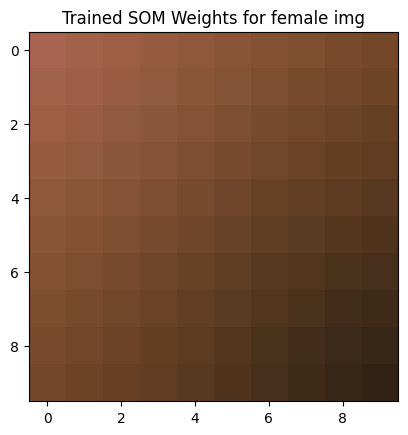

In [23]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for female img')
plt.show()